In [1]:
# Setting up spark configuration and context

from pyspark import SparkConf, SparkContext

spark_conf = SparkConf()\
        .setAppName("Assignment-1")
sc=SparkContext.getOrCreate(spark_conf) 

In [11]:
import operator

In [2]:
# Loading data 
#read the input and convert into RDD of String
data = sc.textFile("Dataset.csv")

In [3]:
# Checking data 
print(type(data))
print(data.take(3))

<class 'pyspark.rdd.RDD'>
['SbOwzAl9ZfQ,17.14.11,Entertainment,310130,4182,361,MX', 'klOV6Xh-DnI,17.14.11,People & Blogs,104972,271,174,MX', '6L2ZF7Qzsbk,17.14.11,News & Politics,136064,10105,266,MX']


# <font color=Black> Workload - 1 </font>
## <font color=Black> Controversial Trending Videos Identification </font>

### <font color=Maroon> Computation Graph </font>
<div>
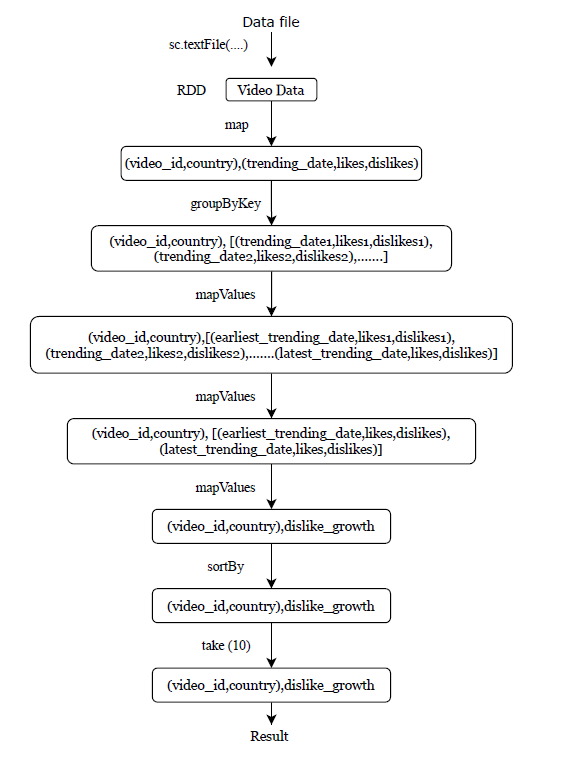
</div>

In [14]:
# This cell includes functions used in Controversial Trending Videos Identification

# Function to extract necessary initial values from data in required format
def extract_initial_values(data_row):
  try:
    video_id,trending_date,category,views,likes,dislikes,country = data_row.split(",")
    year,date,month = trending_date.split('.')
    trending_date_formatted = year+'.'+month+'.'+date
    return ((video_id,country),(trending_date_formatted,likes,dislikes))
  except:
    return ()

# Function to sort trending dates
def sort_dates(data):
  list_of_data = list(data)
  list_len = len(list_of_data)
  list_of_data.sort(key = operator.itemgetter(0))
  return list_of_data

# Function to keep only earliest and latest trending dates
def keep_dates(data):
  list_of_data = list(data)
  list_len = len(list_of_data)
  if list_len == 1:
    return list_of_data
  else: 
    return [list_of_data[0],list_of_data[list_len-1]]

# Function to calculate dislike growth
def calculate_dislike_growth(data):
  data_list = list(data)
  if len(data_list) == 2:
    dislike_growth = (int(data_list[1][2]) - int(data_list[0][2])) - (int(data_list[1][1])-int(data_list[0][1]))
  elif len(data_list) == 1:
    dislike_growth = int(data_list[0][2]) - int(data_list[0][1])
  return dislike_growth

# Function to get result in required format
def get_result_in_required_format(data):
    list_data = list(data)
    video_id = list_data[0][0]
    country = list_data[0][1]
    dislike_growth = list_data[1]
    return video_id,dislike_growth,country

In [15]:
# Spark function skeleton based on computation graph

initial_data = data.map(extract_initial_values)

groupeddata_by_video_id = initial_data.groupByKey()

data_after_sorting_dates = groupeddata_by_video_id.mapValues(sort_dates)

data_with_only_earliest_latest_date = data_after_sorting_dates.mapValues(keep_dates)

data_with_dislike_growth = data_with_only_earliest_latest_date.mapValues(calculate_dislike_growth)

result = data_with_dislike_growth.sortBy(lambda x:x[1],ascending=False)

result_in_required_format = result.map(get_result_in_required_format)

final_result = result_in_required_format.take(10)

# print(*final_result, sep = "\n")

In [16]:
# Checkpoints after each stage of the computation graph to inspect each intermediate RDD element  

print(type(initial_data))
print(initial_data.take(3))
print()

print(type(groupeddata_by_video_id))
print(groupeddata_by_video_id.take(3))
# for my understanding 
groupeddata_values = groupeddata_by_video_id.map(lambda x : (x[0], list(x[1]))).collect() # list of tuples 
print(groupeddata_values[0])
print()

print(type(data_after_sorting_dates))
# for my understanding 
print(data_after_sorting_dates.take(3)[0][1][0])
print()

print(type(data_with_only_earliest_latest_date))
print(data_with_only_earliest_latest_date.take(3))
print()

print(type(data_with_dislike_growth))
print(data_with_dislike_growth.take(3))
print()

print(type(result))
print(result.take(10))
print()

print(type(result_in_required_format))
print(result_in_required_format.take(10))
print()

print(*final_result, sep = "\n")

<class 'pyspark.rdd.PipelinedRDD'>
[(('SbOwzAl9ZfQ', 'MX'), ('17.11.14', '4182', '361')), (('klOV6Xh-DnI', 'MX'), ('17.11.14', '271', '174')), (('6L2ZF7Qzsbk', 'MX'), ('17.11.14', '10105', '266'))]

<class 'pyspark.rdd.PipelinedRDD'>
[(('SbOwzAl9ZfQ', 'MX'), <pyspark.resultiterable.ResultIterable object at 0x7fdb5594e100>), (('_OXDcGPVAa4', 'MX'), <pyspark.resultiterable.ResultIterable object at 0x7fdb55948f10>), (('Q9kK6NWZR1U', 'MX'), <pyspark.resultiterable.ResultIterable object at 0x7fdb55948af0>)]
(('SbOwzAl9ZfQ', 'MX'), [('17.11.14', '4182', '361'), ('17.11.15', '5891', '553')])

<class 'pyspark.rdd.PipelinedRDD'>
('17.11.14', '4182', '361')

<class 'pyspark.rdd.PipelinedRDD'>
[(('SbOwzAl9ZfQ', 'MX'), [('17.11.14', '4182', '361'), ('17.11.15', '5891', '553')]), (('_OXDcGPVAa4', 'MX'), [('17.11.14', '57781', '681'), ('17.11.15', '93269', '1792')]), (('Q9kK6NWZR1U', 'MX'), [('17.11.14', '506', '67')])]

<class 'pyspark.rdd.PipelinedRDD'>
[(('SbOwzAl9ZfQ', 'MX'), -1517), (('_OXDcGPV

#### <font color=Black> The top 10 videos with fastest growth of dislikes number between its first and last trending appearances </font>

In [17]:
print(*final_result, sep = "\n")

('QwZT7T-TXT0', 579119, 'GB')
('QwZT7T-TXT0', 478100, 'US')
('BEePFpC9qG8', 365862, 'DE')
('RmZ3DPJQo2k', 334390, 'KR')
('q8v9MvManKE', 299044, 'IN')
('pOHQdIDds6s', 160365, 'CA')
('ZGEoqPpJQLE', 151913, 'RU')
('84LBjXaeKk4', 134836, 'FR')
('84LBjXaeKk4', 134834, 'DE')
('84LBjXaeKk4', 121240, 'RU')


# <font color=Black> Workload - 2 </font>
## <font color=Black> Category and Trending Correlation </font>

### <font color=Maroon> Computation Graph </font>

<div>
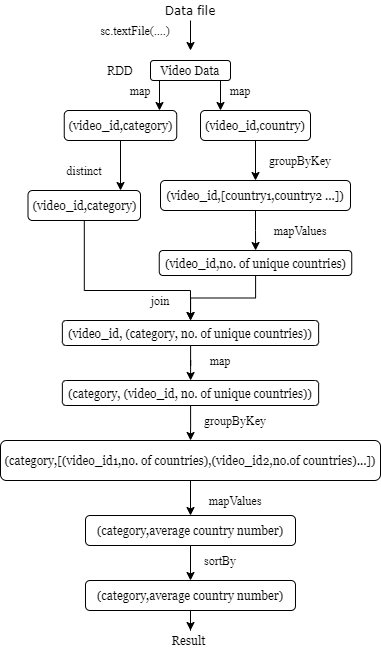
</div>

In [18]:
# This cell includes functions used in analysing Category and Trending Correlation

# Function to Extract videoid and category in one RDD 
def extract_id_category(data_row):
  try:
    video_id,trending_date,category,views,likes,dislikes,country = data_row.split(",")
    return (video_id,category)
  except:
    return ()

# Function to Extract videoid and country in one RDD 
def extract_id_country(data_row):
  try:
    video_id,trending_date,category,views,likes,dislikes,country = data_row.split(",")
    return (video_id,country)
  except:
    return ()

# Function to count unique countries for a video id 
def count_countries(data_row):
  list_data = list(data_row)
  unique_countries = set(list_data)
  number_of_countries = len(unique_countries)
  return number_of_countries

# Function to Extract video id category and number of countries in required format
def extract_data_in_required_format(data):
  list_data = list(data)
  video_id = list_data[0]
  category = list_data[1][0]
  no_of_countries = list_data[1][1]
  return category, (video_id,no_of_countries)

# Function to Calculate Average country number for videos in a category
def calculate_average_country_number(data):
  list_data = list(data)
  no_of_video_ids = len(list_data)
  sum = 0 
  for i in range(0,no_of_video_ids):
    sum += list_data[i][1]
  avg_country_num = sum / no_of_video_ids
  return avg_country_num

In [19]:
# Spark function skeleton based on computation graph

initial_category_data = data.map(extract_id_category)

initial_country_data = data.map(extract_id_country)

initial_country_data_grouped = initial_country_data.groupByKey()

country_count = initial_country_data_grouped.mapValues(count_countries)

category_countries_data = initial_category_data.distinct().join(country_count)

category_countries_data_in_format = category_countries_data.map(extract_data_in_required_format)

grouped_data_category = category_countries_data_in_format.groupByKey()

result = grouped_data_category.mapValues(calculate_average_country_number)

final_result = result.sortBy(lambda x:x[1])

final_result_sorted = final_result.collect()

In [20]:
# Checkpoints after each stage of the computation graph to inspect each intermediate RDD element  

print(type(initial_category_data))
print(initial_category_data.take(3))
print()

print(type(initial_country_data))
print(initial_country_data.take(3))
print()

print(type(initial_country_data_grouped))
print(initial_country_data_grouped.take(1))
print(initial_country_data_grouped.map(lambda x : (x[0], list(x[1]))).collect()[1])
print()

print(type(country_count))
print(country_count.take(2))
print()

print(type(category_countries_data))
print(category_countries_data.take(2))
print()

print(type(category_countries_data_in_format))
print(category_countries_data_in_format.take(2))
print()

print(type(grouped_data_category))
print(grouped_data_category.take(2))
#print(grouped_data_category.map(lambda x : (x[0], list(x[1]))).collect()[4])
print()

print(type(result))
print(result.collect())
print()

print(type(final_result))
print(final_result.collect())
print()

<class 'pyspark.rdd.PipelinedRDD'>
[('SbOwzAl9ZfQ', 'Entertainment'), ('klOV6Xh-DnI', 'People & Blogs'), ('6L2ZF7Qzsbk', 'News & Politics')]

<class 'pyspark.rdd.PipelinedRDD'>
[('SbOwzAl9ZfQ', 'MX'), ('klOV6Xh-DnI', 'MX'), ('6L2ZF7Qzsbk', 'MX')]

<class 'pyspark.rdd.PipelinedRDD'>
[('SbOwzAl9ZfQ', <pyspark.resultiterable.ResultIterable object at 0x7fdafee2df10>)]
('_OXDcGPVAa4', ['MX', 'MX'])

<class 'pyspark.rdd.PipelinedRDD'>
[('SbOwzAl9ZfQ', 1), ('_OXDcGPVAa4', 1)]

<class 'pyspark.rdd.PipelinedRDD'>
[('SbOwzAl9ZfQ', ('Entertainment', 1)), ('GZGdFRttWDI', ('Film & Animation', 1))]

<class 'pyspark.rdd.PipelinedRDD'>
[('Entertainment', ('SbOwzAl9ZfQ', 1)), ('Film & Animation', ('GZGdFRttWDI', 1))]

<class 'pyspark.rdd.PipelinedRDD'>
[('Entertainment', <pyspark.resultiterable.ResultIterable object at 0x7fdafee26700>), ('Nonprofits & Activism', <pyspark.resultiterable.ResultIterable object at 0x7fdafee11490>)]

<class 'pyspark.rdd.PipelinedRDD'>
[('Entertainment', 1.1447534885477444),

#### <font color=Black> Category and Trending Correlation - The average country number for videos in each category </font>

In [21]:
print(*final_result_sorted, sep = "\n")

('Trailers', 1.0)
('Autos & Vehicles', 1.0190448285965426)
('News & Politics', 1.052844979051223)
('Nonprofits & Activism', 1.057344064386318)
('Education', 1.0628976994615762)
('People & Blogs', 1.0640343760329336)
('Pets & Animals', 1.0707850707850708)
('Howto & Style', 1.0876256925918326)
('Travel & Events', 1.0929411764705883)
('Gaming', 1.0946163477016635)
('Sports', 1.1422245184146431)
('Entertainment', 1.1447534885477444)
('Science & Technology', 1.1626835588828102)
('Film & Animation', 1.1677314564158094)
('Comedy', 1.2144120659156503)
('Movies', 1.25)
('Music', 1.310898044427568)
('Shows', 1.614678899082569)
